# SUMMARIZATION TECHNIQUES

## USE OF DATASETS WITH GROUND TRUTH FOR COMPARING THE DIFFERENT SUMMARIZATION TECHNIQUES

### FIRST DATASET - QMSUM WITH DISCUSSION ABOUT PRODUCTS

In [1]:
import json
import pandas as pd

# Load the JSON data
with open('datasets/QMSum/data/Product/train/ES2002c.json', 'r') as f:
    data = json.load(f)


print(data.keys())
df_topics = pd.DataFrame(data['topic_list'])
df_query_list = pd.DataFrame(data['general_query_list'])
df_comments = pd.DataFrame(data['meeting_transcripts'])
print('--------------------------------------------------------------------------------------------------------------------')
print(df_comments)
print('--------------------------------------------------------------------------------------------------------------------')
print(df_topics)

dict_keys(['topic_list', 'general_query_list', 'specific_query_list', 'meeting_transcripts'])
--------------------------------------------------------------------------------------------------------------------
                 speaker                                            content
0    Industrial Designer  'S to do now is to decide how to fulfil what y...
1              Marketing                                             Yeah .
2    Industrial Designer                      so in that sense {disfmarker}
3        Project Manager                                             Okay .
4              Marketing                                      Yeah , sure .
..                   ...                                                ...
635  Industrial Designer                                    Play-doh time .
636      Project Manager                      Yeah quite jealous actually .
637  Industrial Designer  You got to choose first . {vocalsound} No , we...
638            Marketing     

                 speaker                                        content
92       Project Manager  Um thank you for that . Uh Craig do you wanna
93             Marketing                                          Yep .
94       Project Manager                        uh plug yours in then ?
95        User Interface                                Is it working ?
96       Project Manager                  {vocalsound} Mm . Not quite .
..                   ...                                            ...
311            Marketing                                       Mm-hmm .
312      Project Manager                                          Right
313  Industrial Designer                                  glowingness .
314      Project Manager                      okay um well {vocalsound}
315            Marketing                                 Okay , great .

[224 rows x 2 columns]


C:\1. Python\LLM_mods_Topic_Modelling\utils\plot_words_distribution.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df[column_to_plot].apply(lambda x: no_of_words(x) if isinstance(x, str) else 0)


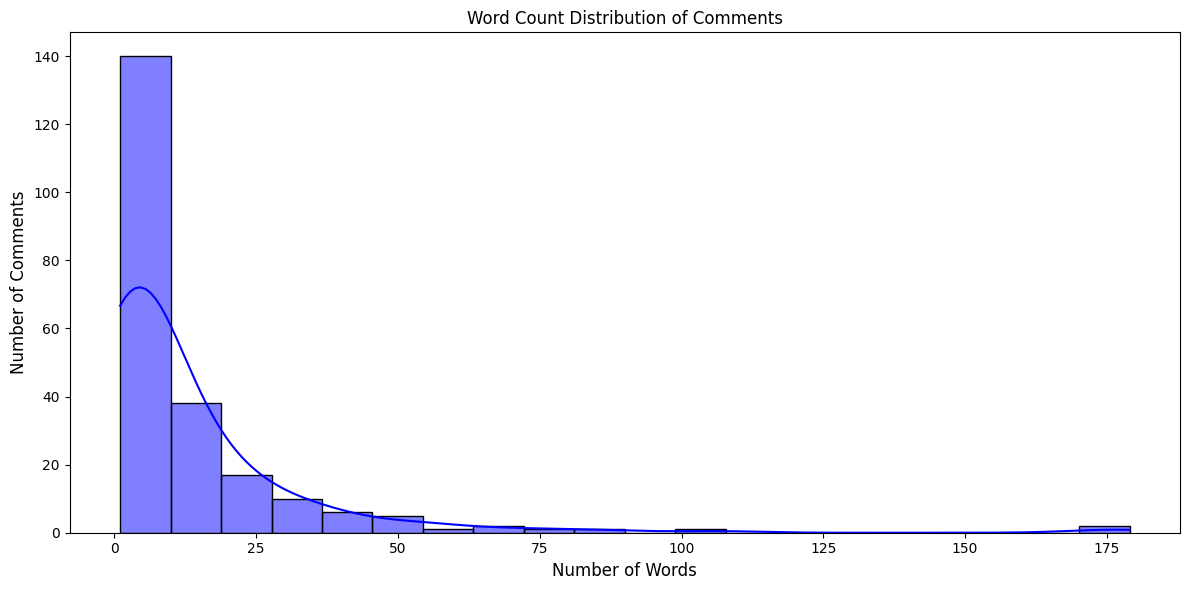

In [2]:
from utils.plot_words_distribution import plot_distribution_of_words

text_col = 'content'

# take the topic No2:  Presentation on the component design
df_sum_3 = df_comments[92:316]
print(df_sum_3)

# plot the distribution of words
plot_distribution_of_words(df_sum_3, text_col)

In [3]:
from utils.load_prompts import load_chosen_prompt
from summarization_methods.divide_comments_and_summarize import divide_comments_by_time, create_summary_for_groups_of_comments
from utils.load_pretrained_spacy_model import load_pretrained_model
from sklearn.model_selection import train_test_split


# load the final dataset and the language
df_sum_3, _ = load_pretrained_model(df=df_sum_3, text_col=text_col)

# load the prompt template
prompt_template = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The language of the dataset is: en
The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


C:\1. Python\LLM_mods_Topic_Modelling\utils\load_pretrained_spacy_model.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language'] = df[text_col].apply(detect_language)


### 1ST SUMMARIZATION TECHNIQUE: SEPARATE COMMENTS RANDOMLY INTO GROUPS

We are going to implement a simple technique by grouping the comments/reviews into groups randomly, create a summary for each group of comments and finally a final summarization based on the summaries of group of comments

In [4]:
from summarization_methods.divide_comments_and_summarize import divide_comments_by_time, create_summary_for_groups_of_comments

language = 'English'
topic = df_topics.iloc[2].topic

# divide the comments into groups
groups_1 = divide_comments_by_time(df_sum_3, text_column='content')

#create the summaries
summaries_1 = create_summary_for_groups_of_comments(groups=groups_1, prompt=prompt_template, gpt_model='gpt-4o', language=language, topic=topic)

Comments do not contain timestamp. Continue the group by shuffle them.


  7%|█████████████▌                                                                                                                                                                                             | 1/15 [00:01<00:27,  1.98s/it]

**Summary:**
The comments primarily discuss the standard features and components of the design. A key topic addressed is power consumption, which is expected to remain consistent, though the main impact discussed is complexity. Additionally, the comments highlight the power options, noting a standard battery and a more unconventional wind-up cranking option, which is thought to be more of a gimmick than practical. The conversation also touches on certain restrictions, including an LCD display. There is a mix of vocal sounds and simpler affirmations, reflecting ongoing consideration and contemplation among the participants.


 13%|███████████████████████████                                                                                                                                                                                | 2/15 [00:03<00:20,  1.61s/it]

**Summary:**

The comments predominantly discuss the design considerations, material choices, and component simplification for a presentation on component design. Key topics include the shape of the case, with options being flat or curved, and the types of materials that can be used, highlighting that combination use (e.g., plastic and rubber) may not be feasible. The importance of fewer and simpler components is emphasized to reduce costs, increase profits, and expedite market readiness. Additionally, there's a viewpoint that any extra features beyond the basics should be hidden unless accessed by special effort. Finally, ensuring a good battery life for the remote control is underscored to prevent frequent recharging.


 20%|████████████████████████████████████████▌                                                                                                                                                                  | 3/15 [00:04<00:16,  1.37s/it]

**Summary:**

The comments revolve around the necessary components and processes for the component design. A key element discussed is the importance of having a battery, with the suggestion that additional components might be needed. There's also an emphasis on having confirmatory signals for actions taken. The discussion reflects a process-oriented approach, highlighting the need for participants to understand and work through the involved steps. Additionally, there is a focus on ensuring clarity and affirmation in the process to avoid misunderstandings.


 27%|██████████████████████████████████████████████████████▏                                                                                                                                                    | 4/15 [00:05<00:14,  1.36s/it]

**Summary:**

The comments primarily focus on the practical and technical considerations of the component design, specifically addressing the LCD panel's power requirements and responsiveness. There is an extensive mention of issues related to sensitivity and the physical interaction needed for proper functioning, such as shaking or knocking the device. Additionally, the discussion touches upon major factors like cost, complexity, and size, which are identified as significant impacts on the overall design. The group expresses a desire to conclude the discussion efficiently within the remaining time, emphasizing the importance of these considerations in determining viable options. Lastly, there's uncertainty regarding the use of voice options, highlighting a need for further clarification.




 33%|███████████████████████████████████████████████████████████████████▋                                                                                                                                       | 5/15 [00:07<00:13,  1.35s/it]

**Summary:**

The comments mainly discuss the idea of illuminating buttons, especially in the context of usability in dark environments, such as finding and operating the remote in the dark while watching a DVD. The concept of button illumination is considered both a practical feature and a potential marketing gimmick. There is also mention of combining this feature with rubber components, indicating a design choice that could appeal to those who enjoy tactile interaction. The conversation includes brief affirmations and vocal sounds, reflecting a generally positive reception towards the idea of illuminated buttons as a sales feature. The marketing angle, specifically the appeal of innovative technologies, is also highlighted.


 40%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                                                         | 6/15 [00:08<00:12,  1.40s/it]

**Summary:**

The comments touch upon various aspects of the component design with a focus on user interaction and practical features. A unique idea discussed is the inclusion of a mouse scroll wheel for the remote control, which adds a familiar interaction method. Additionally, there's a mention of the remote's potential to communicate with the user verbally, but with an uncertainty about its ability to listen and respond, indicating a need for clarification on voice interaction capabilities. The conversation includes lighthearted suggestions like throwing the remote when frustrated, reflecting on user behavior. A brief note on color themes, specifically concerning yellow elements on a website and Play-Doh, hints at design aesthetics. Overall, the discussion entertains both functional and playful elements, shedding light on user experience considerations.



 47%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                            | 7/15 [00:12<00:17,  2.20s/it]

**Summary:**

The comments explore various aspects of the component design with an emphasis on practicality and material choices. There is a discussion about the feasibility of using alternative power sources, with a consensus that a battery remains essential to ensure user convenience. The process of starting from scratch or modifying existing designs is considered based on specific needs, while logic chips are mentioned as a critical component affecting both cost and functionality. Size concerns for logic chips seem minimal since they are generally uniform. The inclusion of solar-powered cells is noted, indicating an interest in sustainable energy options. Material preferences include plastic and rubber, but there is hesitation about integrating wood and titanium. Finally, a query about a corporate color scheme suggests consideration for aesthetic consistency.


 53%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                              | 8/15 [00:13<00:13,  1.93s/it]

**Summary:**

The comments focus on both aesthetic flexibility and technical considerations of the component design. A significant portion of the discussion revolves around the corporate color scheme's flexibility, raising questions about whether alternative colors can be used. Additionally, there is concern about the battery power sufficiency, especially for powering a light component, pointing to a broader need to ensure robust power solutions. The conversation includes vocal affirmations and brief discussions on handling the components, reflecting an interactive and experimental approach. Furthermore, the mention of a potential yellow color for parts indicates ongoing decisions regarding color themes. Overall, the discussion captures both the technical challenges and design preferences being considered.


 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 9/15 [00:16<00:12,  2.12s/it]

**Summary:**

The comments highlight several key insights regarding the design of remote controls. A major issue discussed is the bulky and unattractive nature of current models, often described as "big bricks" with numerous buttons and typically in dark colors, making them difficult to find in shadowy places. The idea of incorporating lights or glow features, potentially akin to a "Frankenstein" effect, is debated, suggesting a desire for illuminated or visually distinctive controls.

There is a suggestion to group plastic and rubber together due to their similarities, but a caution against mixing them with materials like wood and titanium. An email from the research department indicates that voice control technology has advanced to the point where remotes can now respond to user queries, adding an interactive dimension to the discussion.

The need for consistent color schemes on buttons is stressed, particularly for usability purposes—such as making the standby button red for easy id

 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 10/15 [00:17<00:09,  1.94s/it]

**Summary:**

The comments emphasize practical considerations regarding the design of components, particularly focusing on the materials and functionality. The idea that certain materials, such as wood, cannot be used for curved designs is highlighted, reflecting limitations in material design flexibility. Additionally, the discussion touches on the absence of restrictions on plastic usage, suggesting its viability as a preferred material due to its versatility.

There are queries about the type of lighting needed, indicating ongoing decisions related to illumination features. The comments also mention the convenience of features, emphasizing a user-friendly approach. Interactive affirmations throughout the discussion suggest a collaborative and positive atmosphere as participants delve into the specifics of component design.


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 11/15 [00:19<00:07,  1.82s/it]

**Summary:**

The comments discuss various aspects of the component design, emphasizing both practical and aesthetic considerations. A recurring theme is the need for a remote control that is comfortable to hold, with a preference for a small and slim design that is not too small to handle easily. Additionally, there's a discussion around slogan placement, with some uncertainty about where it should go or what it should be. 

There's also a mention of possibly making cost-effective choices, suggesting that simplicity in design could be beneficial. The importance of avoiding a tacky appearance is highlighted, potentially aligning with previous suggestions for a lime and lemon color scheme. Overall, the comments reflect a focus on comfort, practicality, and cohesive aesthetics.


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 12/15 [00:21<00:05,  1.76s/it]

**Summary:**

The comments contribute to the ongoing discussion on component design by reiterating practical and design considerations. A significant topic of discussion is battery power, with participants questioning its sufficiency for sustained operation, similar to concerns previously expressed for remote controls and lighting components. The incorporation of a yellow, lemon-themed color scheme is briefly mentioned, echoing earlier aesthetic debates.

Material considerations surface as well, touching on the advantages and limitations of different materials, such as plastic, rubber, and titanium, for specific shapes and designs—an extension of prior discussions on material flexibility. This aligns with previous hesitations about integrating certain materials like wood for complex designs. The conversation also includes vocal affirmations and interactive engagement, illustrating a collaborative atmosphere. Overall, the comments underscore the need for balancing practical functionalit

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 13/15 [00:22<00:03,  1.79s/it]

**Summary:**

The comments revolve around enhancing the technological and aesthetic aspects of the component design, emphasizing the integration of high-tech features. There is a suggestion to incorporate high-tech elements to elevate the design, implying a need for advanced and innovative components. An idea to use stress ball-like features that light up when bounced indicates a desire for interactive and visually stimulating elements. 

Practical considerations are also discussed, such as the need for a strong battery to ensure the device’s reliable performance. Acknowledging the restrictions on materials like rubber and titanium, the comments indicate that material choices are influenced by specific requirements and constraints. There is a mention of a titanium case and checking its compatibility, suggesting ongoing deliberations on the best material options for different design elements.

Overall, the comments reflect a focus on high-tech integration, user interactivity, and practi

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 14/15 [00:24<00:01,  1.85s/it]

**Summary:**

The comments focus on several pivotal aspects regarding the design of the component, with significant emphasis on user interaction and component integration. The kinetic energy concept is a popular topic, indicating interest in a design where the remote control powers up similarly to an automatic watch, providing practical energy-saving benefits. 

The viability of incorporating lighting features that activate upon touch or pick-up is also discussed, suggesting a preference for intuitive and responsive elements. In terms of appearance and structure, there are suggestions to optimize the size and placement of buttons and overall shape for ergonomic usability.

Considerations around the user interface highlight the need for simplicity without compromising functionality, with discussions on the balance between visible and hidden functions to ensure ease of use. Additionally, comments on material restrictions, such as rubber limiting power source options and the complexity an

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:27<00:00,  1.82s/it]

**Summary:**
  
The comments delve into the key aspects of component design with an emphasis on practicality and user-friendliness. One prominent idea is the potential use of a bouncing ball mechanism to power lighting features, reflecting a desire for innovative and interactive elements. The discussion highlights the need for clear identification, suggesting the incorporation of bright colors that align with corporate branding, allowing for easy location in dim settings.

Ergonomic considerations are also a focal point, particularly in improving button designs to avoid confusion, such as ensuring the volume buttons are intuitive to use even in the dark. The comments suggest avoiding the use of certain materials like titanium in combination with others due to design constraints, noting that titanium cases must remain square and cannot be curved, highlighting a crucial material limitation.

Voice activation is suggested as an advanced feature, but there is consensus on the necessity of 

In [5]:
# load the prompt template
prompt_template_final_1 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_comments')

The number of arguments to contain in the prompt are: 2
The required arguments are: ['topic', 'summaries']


#### FINAL SUMMARY BASED ON SUMMARIES OF COMMENTS

In [6]:
from summarization_methods.divide_comments_and_summarize import final_summary_of_divided_comments
topic = df_topics.iloc[2].topic

#create the summaries
final_summary_1 = final_summary_of_divided_comments(prompt=prompt_template_final_1, gpt_model='gpt-4o', topic=topic, summaries=summaries_1)

**Final Summary:**

The discussion on component design primarily revolves around striking a balance between functionality, practicality, and aesthetics. Several key themes consistently emerge from the comments, highlighting both the challenges and solutions proposed by the participants.

1. **Power Consumption and Sources:** A recurring topic is power consumption, with a consensus on the importance of battery life to prevent frequent recharging. There are also discussions about alternative power sources such as kinetic energy and wind-up cranking, which, although innovative, are deemed impractical. Solar-powered cells are considered for their sustainability. Consistent battery power is emphasized, especially for features like illumination.

2. **Material Choices and Design Constraints:** The choice of materials is a significant area of exploration, focusing on practicality and design limitations. Plastic and rubber are preferred for their versatility, whereas materials like wood and ti

### 2ND SUMMARIZATION TECHNIQUE: CLASSIFY COMMENTS BASED ON LABELS AND SUMMARY THE LABELS

We are going to implement more complicated technique, in which we are going to classify comments based on some labels that we are going to define. For each label for are going to create summaries and finally a final summary based on these summaries

In [7]:
from summarization_methods.classification_of_comments_and_summarization import classify_comments

df_sum_3 = classify_comments(df=df_sum_3, text_col='content', prompt_name='prompt_for_classification_QMSUM', gpt_model='gpt-4o')

  0%|▉                                                                                                                                                                                                         | 1/224 [00:00<03:12,  1.16it/s]

'0'
Chosen label from GPT model is: 0


  1%|█▊                                                                                                                                                                                                        | 2/224 [00:01<03:02,  1.22it/s]

'1'
Chosen label from GPT model is: 1


  1%|██▋                                                                                                                                                                                                       | 3/224 [00:02<03:00,  1.23it/s]

'1'
Chosen label from GPT model is: 1


  2%|███▌                                                                                                                                                                                                      | 4/224 [00:02<02:29,  1.47it/s]

'1'
Chosen label from GPT model is: 1


  2%|████▌                                                                                                                                                                                                     | 5/224 [00:03<02:14,  1.62it/s]

'2'
Chosen label from GPT model is: 2


  3%|█████▍                                                                                                                                                                                                    | 6/224 [00:03<02:03,  1.77it/s]

1
Chosen label from GPT model is: 1


  3%|██████▎                                                                                                                                                                                                   | 7/224 [00:04<02:20,  1.54it/s]

'2'
Chosen label from GPT model is: 2


  4%|███████▏                                                                                                                                                                                                  | 8/224 [00:05<02:10,  1.66it/s]

'1'
Chosen label from GPT model is: 1


  4%|████████                                                                                                                                                                                                  | 9/224 [00:05<01:59,  1.79it/s]

'1'
Chosen label from GPT model is: 1


  4%|████████▉                                                                                                                                                                                                | 10/224 [00:06<01:55,  1.85it/s]

'1'
Chosen label from GPT model is: 1


  5%|█████████▊                                                                                                                                                                                               | 11/224 [00:06<01:51,  1.92it/s]

'1'
Chosen label from GPT model is: 1


  5%|██████████▊                                                                                                                                                                                              | 12/224 [00:07<01:48,  1.96it/s]

'1'
Chosen label from GPT model is: 1


  6%|███████████▋                                                                                                                                                                                             | 13/224 [00:07<02:07,  1.65it/s]

'2'
Chosen label from GPT model is: 2


  6%|████████████▌                                                                                                                                                                                            | 14/224 [00:08<02:01,  1.72it/s]

'2'
Chosen label from GPT model is: 2


  7%|█████████████▍                                                                                                                                                                                           | 15/224 [00:08<01:54,  1.82it/s]

1
Chosen label from GPT model is: 1


  7%|██████████████▎                                                                                                                                                                                          | 16/224 [00:09<01:55,  1.80it/s]

'2'
Chosen label from GPT model is: 2


  8%|███████████████▎                                                                                                                                                                                         | 17/224 [00:10<01:49,  1.88it/s]

'1'
Chosen label from GPT model is: 1


  8%|████████████████▏                                                                                                                                                                                        | 18/224 [00:10<01:46,  1.94it/s]

`2`
Chosen label from GPT model is: 2


  8%|█████████████████                                                                                                                                                                                        | 19/224 [00:10<01:43,  1.99it/s]

'1'
Chosen label from GPT model is: 1


  9%|█████████████████▉                                                                                                                                                                                       | 20/224 [00:11<02:02,  1.67it/s]

'0'
Chosen label from GPT model is: 0


  9%|██████████████████▊                                                                                                                                                                                      | 21/224 [00:12<01:54,  1.77it/s]

1
Chosen label from GPT model is: 1


 10%|███████████████████▋                                                                                                                                                                                     | 22/224 [00:12<01:56,  1.73it/s]

'1'
Chosen label from GPT model is: 1


 10%|████████████████████▋                                                                                                                                                                                    | 23/224 [00:13<01:50,  1.82it/s]

'2'
Chosen label from GPT model is: 2


 11%|█████████████████████▌                                                                                                                                                                                   | 24/224 [00:13<01:46,  1.87it/s]

'1'
Chosen label from GPT model is: 1


 11%|██████████████████████▍                                                                                                                                                                                  | 25/224 [00:14<02:02,  1.63it/s]

'1'
Chosen label from GPT model is: 1


 12%|███████████████████████▎                                                                                                                                                                                 | 26/224 [00:15<01:53,  1.75it/s]

'1'
Chosen label from GPT model is: 1


 12%|████████████████████████▏                                                                                                                                                                                | 27/224 [00:15<01:46,  1.85it/s]

2
Chosen label from GPT model is: 2


 12%|█████████████████████████▏                                                                                                                                                                               | 28/224 [00:16<01:42,  1.91it/s]

'1'
Chosen label from GPT model is: 1


 13%|██████████████████████████                                                                                                                                                                               | 29/224 [00:16<01:39,  1.96it/s]

'0'
Chosen label from GPT model is: 0


 13%|██████████████████████████▉                                                                                                                                                                              | 30/224 [00:17<01:35,  2.03it/s]

0
Chosen label from GPT model is: 0


 14%|███████████████████████████▊                                                                                                                                                                             | 31/224 [00:17<01:35,  2.02it/s]

'1'
Chosen label from GPT model is: 1


 14%|████████████████████████████▋                                                                                                                                                                            | 32/224 [00:18<01:35,  2.00it/s]

'1'
Chosen label from GPT model is: 1


 15%|█████████████████████████████▌                                                                                                                                                                           | 33/224 [00:18<01:33,  2.04it/s]

1
Chosen label from GPT model is: 1


 15%|██████████████████████████████▌                                                                                                                                                                          | 34/224 [00:19<01:33,  2.04it/s]

'1'
Chosen label from GPT model is: 1


 16%|███████████████████████████████▍                                                                                                                                                                         | 35/224 [00:19<01:32,  2.05it/s]

'2'
Chosen label from GPT model is: 2


 16%|████████████████████████████████▎                                                                                                                                                                        | 36/224 [00:19<01:31,  2.05it/s]

1
Chosen label from GPT model is: 1


 17%|█████████████████████████████████▏                                                                                                                                                                       | 37/224 [00:20<01:32,  2.01it/s]

'2'
Chosen label from GPT model is: 2


 17%|██████████████████████████████████                                                                                                                                                                       | 38/224 [00:20<01:31,  2.04it/s]

'2'
Chosen label from GPT model is: 2


 17%|██████████████████████████████████▉                                                                                                                                                                      | 39/224 [00:21<01:29,  2.07it/s]

'1'
Chosen label from GPT model is: 1


 18%|███████████████████████████████████▉                                                                                                                                                                     | 40/224 [00:21<01:28,  2.08it/s]

'0'
Chosen label from GPT model is: 0


 18%|████████████████████████████████████▊                                                                                                                                                                    | 41/224 [00:22<01:27,  2.10it/s]

'2'
Chosen label from GPT model is: 2


 19%|█████████████████████████████████████▋                                                                                                                                                                   | 42/224 [00:22<01:27,  2.08it/s]

'1'
Chosen label from GPT model is: 1


 19%|██████████████████████████████████████▌                                                                                                                                                                  | 43/224 [00:23<01:26,  2.09it/s]

'0'
Chosen label from GPT model is: 0


 20%|███████████████████████████████████████▍                                                                                                                                                                 | 44/224 [00:23<01:25,  2.11it/s]

2
Chosen label from GPT model is: 2


 20%|████████████████████████████████████████▍                                                                                                                                                                | 45/224 [00:24<01:24,  2.12it/s]

'1'
Chosen label from GPT model is: 1


 21%|█████████████████████████████████████████▎                                                                                                                                                               | 46/224 [00:24<01:24,  2.10it/s]

'2'
Chosen label from GPT model is: 2


 21%|██████████████████████████████████████████▏                                                                                                                                                              | 47/224 [00:25<01:25,  2.07it/s]

'2'
Chosen label from GPT model is: 2


 21%|███████████████████████████████████████████                                                                                                                                                              | 48/224 [00:25<01:26,  2.05it/s]

'1'
Chosen label from GPT model is: 1


 22%|███████████████████████████████████████████▉                                                                                                                                                             | 49/224 [00:26<01:25,  2.06it/s]

'2'
Chosen label from GPT model is: 2


 22%|████████████████████████████████████████████▊                                                                                                                                                            | 50/224 [00:26<01:23,  2.09it/s]

0
Chosen label from GPT model is: 0


 23%|█████████████████████████████████████████████▊                                                                                                                                                           | 51/224 [00:27<01:23,  2.08it/s]

'1'
Chosen label from GPT model is: 1


 23%|██████████████████████████████████████████████▋                                                                                                                                                          | 52/224 [00:27<01:22,  2.09it/s]

1
Chosen label from GPT model is: 1


 24%|███████████████████████████████████████████████▌                                                                                                                                                         | 53/224 [00:28<01:22,  2.06it/s]

'0'
Chosen label from GPT model is: 0


 24%|████████████████████████████████████████████████▍                                                                                                                                                        | 54/224 [00:28<01:26,  1.96it/s]

'1'
Chosen label from GPT model is: 1


 25%|█████████████████████████████████████████████████▎                                                                                                                                                       | 55/224 [00:29<01:23,  2.02it/s]

0
Chosen label from GPT model is: 0


 25%|██████████████████████████████████████████████████▎                                                                                                                                                      | 56/224 [00:29<01:21,  2.06it/s]

'1'
Chosen label from GPT model is: 1


 25%|███████████████████████████████████████████████████▏                                                                                                                                                     | 57/224 [00:30<01:19,  2.09it/s]

1
Chosen label from GPT model is: 1


 26%|████████████████████████████████████████████████████                                                                                                                                                     | 58/224 [00:30<01:19,  2.10it/s]

'1'
Chosen label from GPT model is: 1


 26%|████████████████████████████████████████████████████▉                                                                                                                                                    | 59/224 [00:31<01:37,  1.70it/s]

0
Chosen label from GPT model is: 0


 27%|█████████████████████████████████████████████████████▊                                                                                                                                                   | 60/224 [00:31<01:31,  1.79it/s]

'2'
Chosen label from GPT model is: 2


 27%|██████████████████████████████████████████████████████▋                                                                                                                                                  | 61/224 [00:32<01:26,  1.88it/s]

'1'
Chosen label from GPT model is: 1


 28%|███████████████████████████████████████████████████████▋                                                                                                                                                 | 62/224 [00:33<01:39,  1.62it/s]

'1'
Chosen label from GPT model is: 1


 28%|████████████████████████████████████████████████████████▌                                                                                                                                                | 63/224 [00:33<01:47,  1.50it/s]

2
Chosen label from GPT model is: 2


 29%|█████████████████████████████████████████████████████████▍                                                                                                                                               | 64/224 [00:34<01:37,  1.65it/s]

'2'
Chosen label from GPT model is: 2


 29%|██████████████████████████████████████████████████████████▎                                                                                                                                              | 65/224 [00:34<01:29,  1.78it/s]

1
Chosen label from GPT model is: 1


 29%|███████████████████████████████████████████████████████████▏                                                                                                                                             | 66/224 [00:35<01:25,  1.85it/s]

'1'
Chosen label from GPT model is: 1


 30%|████████████████████████████████████████████████████████████                                                                                                                                             | 67/224 [00:35<01:22,  1.89it/s]

'1'
Chosen label from GPT model is: 1


 30%|█████████████████████████████████████████████████████████████                                                                                                                                            | 68/224 [00:36<01:19,  1.95it/s]

'1'
Chosen label from GPT model is: 1


 31%|█████████████████████████████████████████████████████████████▉                                                                                                                                           | 69/224 [00:36<01:18,  1.98it/s]

'1'
Chosen label from GPT model is: 1


 31%|██████████████████████████████████████████████████████████████▊                                                                                                                                          | 70/224 [00:37<01:16,  2.00it/s]

'1'
Chosen label from GPT model is: 1


 32%|███████████████████████████████████████████████████████████████▋                                                                                                                                         | 71/224 [00:37<01:15,  2.04it/s]

'1'
Chosen label from GPT model is: 1


 32%|████████████████████████████████████████████████████████████████▌                                                                                                                                        | 72/224 [00:38<01:14,  2.03it/s]

'1'
Chosen label from GPT model is: 1


 33%|█████████████████████████████████████████████████████████████████▌                                                                                                                                       | 73/224 [00:38<01:12,  2.07it/s]

1
Chosen label from GPT model is: 1


 33%|██████████████████████████████████████████████████████████████████▍                                                                                                                                      | 74/224 [00:39<01:12,  2.06it/s]

'1'
Chosen label from GPT model is: 1


 33%|███████████████████████████████████████████████████████████████████▎                                                                                                                                     | 75/224 [00:39<01:12,  2.05it/s]

'1'
Chosen label from GPT model is: 1


 34%|████████████████████████████████████████████████████████████████████▏                                                                                                                                    | 76/224 [00:40<01:11,  2.07it/s]

'1'
Chosen label from GPT model is: 1


 34%|█████████████████████████████████████████████████████████████████████                                                                                                                                    | 77/224 [00:40<01:11,  2.07it/s]

'1'
Chosen label from GPT model is: 1


 35%|█████████████████████████████████████████████████████████████████████▉                                                                                                                                   | 78/224 [00:41<01:10,  2.08it/s]

'1'
Chosen label from GPT model is: 1


 35%|██████████████████████████████████████████████████████████████████████▉                                                                                                                                  | 79/224 [00:41<01:10,  2.06it/s]

'2'
Chosen label from GPT model is: 2


 36%|███████████████████████████████████████████████████████████████████████▊                                                                                                                                 | 80/224 [00:42<01:10,  2.05it/s]

'1'
Chosen label from GPT model is: 1


 36%|████████████████████████████████████████████████████████████████████████▋                                                                                                                                | 81/224 [00:42<01:09,  2.05it/s]

'2'
Chosen label from GPT model is: 2


 37%|█████████████████████████████████████████████████████████████████████████▌                                                                                                                               | 82/224 [00:43<01:09,  2.05it/s]

        
'2'
Chosen label from GPT model is: 2


 37%|██████████████████████████████████████████████████████████████████████████▍                                                                                                                              | 83/224 [00:43<01:08,  2.07it/s]

'1'
Chosen label from GPT model is: 1


 38%|███████████████████████████████████████████████████████████████████████████▍                                                                                                                             | 84/224 [00:44<01:07,  2.09it/s]

'2'
Chosen label from GPT model is: 2


 38%|████████████████████████████████████████████████████████████████████████████▎                                                                                                                            | 85/224 [00:44<01:06,  2.08it/s]

'1'
Chosen label from GPT model is: 1


 38%|█████████████████████████████████████████████████████████████████████████████▏                                                                                                                           | 86/224 [00:45<01:05,  2.09it/s]

'1'
Chosen label from GPT model is: 1


 39%|██████████████████████████████████████████████████████████████████████████████                                                                                                                           | 87/224 [00:45<01:17,  1.77it/s]

1
Chosen label from GPT model is: 1


 39%|██████████████████████████████████████████████████████████████████████████████▉                                                                                                                          | 88/224 [00:46<01:13,  1.86it/s]

'2'
Chosen label from GPT model is: 2


 40%|███████████████████████████████████████████████████████████████████████████████▊                                                                                                                         | 89/224 [00:46<01:11,  1.89it/s]

'1'
Chosen label from GPT model is: 1


 40%|████████████████████████████████████████████████████████████████████████████████▊                                                                                                                        | 90/224 [00:47<01:07,  1.98it/s]

1
Chosen label from GPT model is: 1


 41%|█████████████████████████████████████████████████████████████████████████████████▋                                                                                                                       | 91/224 [00:47<01:07,  1.98it/s]

'1'
Chosen label from GPT model is: 1


 41%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                                                      | 92/224 [00:48<01:04,  2.04it/s]

1
Chosen label from GPT model is: 1


 42%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                                                     | 93/224 [00:48<01:04,  2.03it/s]

'1'
Chosen label from GPT model is: 1


 42%|████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                    | 94/224 [00:49<01:03,  2.05it/s]

'1'
Chosen label from GPT model is: 1


 42%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                   | 95/224 [00:49<01:02,  2.06it/s]

'1'
Chosen label from GPT model is: 1


 43%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                  | 96/224 [00:50<01:01,  2.07it/s]

'1'
Chosen label from GPT model is: 1


 43%|███████████████████████████████████████████████████████████████████████████████████████                                                                                                                  | 97/224 [00:50<01:01,  2.07it/s]

'1'
Chosen label from GPT model is: 1


 44%|███████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                 | 98/224 [00:51<01:00,  2.08it/s]

'2'
Chosen label from GPT model is: 2


 44%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                | 99/224 [00:51<00:59,  2.09it/s]

'2'
Chosen label from GPT model is: 2


 45%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                              | 100/224 [00:52<01:00,  2.05it/s]

'1'
Chosen label from GPT model is: 1


 45%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                             | 101/224 [00:52<01:12,  1.70it/s]

'1'
Chosen label from GPT model is: 1


 46%|███████████████████████████████████████████████████████████████████████████████████████████                                                                                                             | 102/224 [00:53<01:07,  1.80it/s]

'1'
Chosen label from GPT model is: 1


 46%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                            | 103/224 [00:53<01:04,  1.86it/s]

'2'
Chosen label from GPT model is: 2


 46%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                           | 104/224 [00:54<01:02,  1.93it/s]

'2'
Chosen label from GPT model is: 2


 47%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                          | 105/224 [00:54<01:00,  1.97it/s]

'2'
Chosen label from GPT model is: 2


 47%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                         | 106/224 [00:55<00:58,  2.03it/s]

'1'
Chosen label from GPT model is: 1


 48%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                        | 107/224 [00:55<00:56,  2.08it/s]

1
Chosen label from GPT model is: 1


 48%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                       | 108/224 [00:56<00:55,  2.09it/s]

'1'
Chosen label from GPT model is: 1


 49%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                      | 109/224 [00:58<02:13,  1.16s/it]

'1'
Chosen label from GPT model is: 1


 49%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                     | 110/224 [00:59<01:49,  1.04it/s]

'1'
Chosen label from GPT model is: 1


 50%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                     | 111/224 [01:00<01:33,  1.20it/s]

'1'
Chosen label from GPT model is: 1


 50%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                    | 112/224 [01:00<01:21,  1.38it/s]

'1'
Chosen label from GPT model is: 1


 50%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                   | 113/224 [01:00<01:12,  1.54it/s]

'2'
Chosen label from GPT model is: 2


 51%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                  | 114/224 [01:01<01:05,  1.67it/s]

1
Chosen label from GPT model is: 1


 51%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                 | 115/224 [01:01<01:01,  1.79it/s]

1
Chosen label from GPT model is: 1


 52%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                | 116/224 [01:02<00:57,  1.88it/s]

'1'
Chosen label from GPT model is: 1


 52%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                               | 117/224 [01:02<00:54,  1.95it/s]

'2'
Chosen label from GPT model is: 2


 53%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                              | 118/224 [01:03<00:53,  2.00it/s]

'2'
Chosen label from GPT model is: 2


 53%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                             | 119/224 [01:04<01:01,  1.70it/s]

'1'
Chosen label from GPT model is: 1


 54%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                            | 120/224 [01:04<00:57,  1.81it/s]

'2'
Chosen label from GPT model is: 2


 54%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                            | 121/224 [01:05<00:53,  1.92it/s]

1
Chosen label from GPT model is: 1


 54%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                           | 122/224 [01:05<00:52,  1.96it/s]

'2'
Chosen label from GPT model is: 2


 55%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                          | 123/224 [01:05<00:50,  2.01it/s]

'1'
Chosen label from GPT model is: 1


 55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                         | 124/224 [01:06<00:48,  2.05it/s]

'2'
Chosen label from GPT model is: 2


 56%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 125/224 [01:06<00:47,  2.09it/s]

1
Chosen label from GPT model is: 1


 56%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                       | 126/224 [01:07<00:47,  2.05it/s]

'1'
Chosen label from GPT model is: 1


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                      | 127/224 [01:08<00:56,  1.72it/s]

'2'
Chosen label from GPT model is: 2


 57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                     | 128/224 [01:08<00:52,  1.84it/s]

'1'
Chosen label from GPT model is: 1


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                    | 129/224 [01:09<00:49,  1.91it/s]

'1'
Chosen label from GPT model is: 1


 58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                    | 130/224 [01:09<00:48,  1.95it/s]

'1'
Chosen label from GPT model is: 1


 58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                   | 131/224 [01:10<00:47,  1.96it/s]

'0'
Chosen label from GPT model is: 0


 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                  | 132/224 [01:10<00:45,  2.00it/s]

'1'
Chosen label from GPT model is: 1


 59%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 133/224 [01:11<00:44,  2.05it/s]

0
Chosen label from GPT model is: 0


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                | 134/224 [01:11<00:43,  2.08it/s]

'2'
Chosen label from GPT model is: 2


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 135/224 [01:12<00:43,  2.05it/s]

1
Chosen label from GPT model is: 1


 61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                              | 136/224 [01:12<00:43,  2.03it/s]

'1'
Chosen label from GPT model is: 1


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 137/224 [01:13<00:42,  2.07it/s]

'2'
Chosen label from GPT model is: 2


 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 138/224 [01:13<00:41,  2.08it/s]

'1'
Chosen label from GPT model is: 1


 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 139/224 [01:14<00:48,  1.74it/s]

1
Chosen label from GPT model is: 1


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                           | 140/224 [01:14<00:45,  1.84it/s]

'1'
Chosen label from GPT model is: 1


 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 141/224 [01:15<00:43,  1.92it/s]

'1'
Chosen label from GPT model is: 1


 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                         | 142/224 [01:15<00:41,  1.98it/s]

'1'
Chosen label from GPT model is: 1


 64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                        | 143/224 [01:16<00:39,  2.03it/s]

'1'
Chosen label from GPT model is: 1


 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 144/224 [01:16<00:39,  2.04it/s]

'2'
Chosen label from GPT model is: 2


 65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                      | 145/224 [01:17<00:37,  2.09it/s]

1
Chosen label from GPT model is: 1


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                     | 146/224 [01:17<00:37,  2.09it/s]

'2'
Chosen label from GPT model is: 2


 66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 147/224 [01:18<00:36,  2.09it/s]

'2'
Chosen label from GPT model is: 2


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 148/224 [01:18<00:36,  2.10it/s]

'2'
Chosen label from GPT model is: 2


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 149/224 [01:18<00:35,  2.10it/s]

'1'
Chosen label from GPT model is: 1


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                  | 150/224 [01:19<00:34,  2.14it/s]

1
Chosen label from GPT model is: 1


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                 | 151/224 [01:19<00:34,  2.13it/s]

'1'
Chosen label from GPT model is: 1


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 152/224 [01:20<00:36,  1.99it/s]

1
Chosen label from GPT model is: 1


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 153/224 [01:20<00:34,  2.03it/s]

'1'
Chosen label from GPT model is: 1


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 154/224 [01:21<00:34,  2.02it/s]

'1'
Chosen label from GPT model is: 1


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 155/224 [01:21<00:33,  2.06it/s]

'1'
Chosen label from GPT model is: 1


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                            | 156/224 [01:22<00:33,  2.02it/s]

'1'
Chosen label from GPT model is: 1


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 157/224 [01:22<00:32,  2.06it/s]

'1'
Chosen label from GPT model is: 1


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 158/224 [01:23<00:31,  2.07it/s]

'1'
Chosen label from GPT model is: 1


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 159/224 [01:23<00:31,  2.09it/s]

'1'
Chosen label from GPT model is: 1


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 160/224 [01:24<00:30,  2.12it/s]

'1'
Chosen label from GPT model is: 1


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 161/224 [01:24<00:30,  2.06it/s]

1
Chosen label from GPT model is: 1


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 162/224 [01:25<00:36,  1.72it/s]

'1'
Chosen label from GPT model is: 1


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 163/224 [01:26<00:33,  1.80it/s]

'1'
Chosen label from GPT model is: 1


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 164/224 [01:26<00:31,  1.89it/s]

'2'
Chosen label from GPT model is: 2


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 165/224 [01:27<00:30,  1.96it/s]

1
Chosen label from GPT model is: 1


 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 166/224 [01:27<00:28,  2.01it/s]

'1'
Chosen label from GPT model is: 1


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 167/224 [01:28<00:28,  2.01it/s]

'2'
Chosen label from GPT model is: 2


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 168/224 [01:28<00:27,  2.05it/s]

'1'
Chosen label from GPT model is: 1


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 169/224 [01:28<00:26,  2.08it/s]

'1'
Chosen label from GPT model is: 1


 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 170/224 [01:29<00:25,  2.09it/s]

'2'
Chosen label from GPT model is: 2


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 171/224 [01:29<00:25,  2.11it/s]

'2'
Chosen label from GPT model is: 2


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 172/224 [01:30<00:24,  2.13it/s]

'1'
Chosen label from GPT model is: 1


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 173/224 [01:30<00:25,  1.97it/s]

2
Chosen label from GPT model is: 2


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 174/224 [01:31<00:24,  2.00it/s]

1
Chosen label from GPT model is: 1


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 175/224 [01:31<00:23,  2.05it/s]

'2'
Chosen label from GPT model is: 2


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 176/224 [01:32<00:23,  2.04it/s]

'1'
Chosen label from GPT model is: 1


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 177/224 [01:32<00:22,  2.06it/s]

'2'
Chosen label from GPT model is: 2


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 178/224 [01:33<00:26,  1.74it/s]

1
Chosen label from GPT model is: 1


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 179/224 [01:34<00:25,  1.80it/s]

'1'
Chosen label from GPT model is: 1


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 180/224 [01:34<00:23,  1.89it/s]

1
Chosen label from GPT model is: 1


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 181/224 [01:35<00:22,  1.95it/s]

'1'
Chosen label from GPT model is: 1


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 182/224 [01:35<00:21,  1.97it/s]

'1'
Chosen label from GPT model is: 1


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 183/224 [01:36<00:20,  2.01it/s]

'2'
Chosen label from GPT model is: 2


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 184/224 [01:36<00:23,  1.70it/s]

'1'
Chosen label from GPT model is: 1


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 185/224 [01:37<00:21,  1.80it/s]

'1'
Chosen label from GPT model is: 1


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 186/224 [01:37<00:20,  1.88it/s]

1
Chosen label from GPT model is: 1


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 187/224 [01:38<00:19,  1.94it/s]

'1'
Chosen label from GPT model is: 1


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 188/224 [01:38<00:18,  1.99it/s]

1
Chosen label from GPT model is: 1


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 189/224 [01:39<00:17,  2.04it/s]

'1'
Chosen label from GPT model is: 1


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 190/224 [01:39<00:16,  2.05it/s]

'1'
Chosen label from GPT model is: 1


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 191/224 [01:40<00:16,  2.04it/s]

1
Chosen label from GPT model is: 1


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 192/224 [01:40<00:15,  2.07it/s]

'0'
Chosen label from GPT model is: 0


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 193/224 [01:41<00:14,  2.10it/s]

'1'
Chosen label from GPT model is: 1


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 194/224 [01:41<00:14,  2.11it/s]

'2'
Chosen label from GPT model is: 2


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 195/224 [01:42<00:13,  2.12it/s]

'1'
Chosen label from GPT model is: 1


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 196/224 [01:42<00:13,  2.11it/s]

'1'
Chosen label from GPT model is: 1


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 197/224 [01:43<00:15,  1.76it/s]

1
Chosen label from GPT model is: 1


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 198/224 [01:44<00:16,  1.56it/s]

'1'
Chosen label from GPT model is: 1


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 199/224 [01:44<00:14,  1.68it/s]

'1'
Chosen label from GPT model is: 1


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 200/224 [01:45<00:13,  1.78it/s]

'1'
Chosen label from GPT model is: 1


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 201/224 [01:45<00:12,  1.87it/s]

'0'
Chosen label from GPT model is: 0


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 202/224 [01:46<00:11,  1.95it/s]

'1'
Chosen label from GPT model is: 1


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 203/224 [01:46<00:10,  1.98it/s]

'1'
Chosen label from GPT model is: 1


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 204/224 [01:46<00:09,  2.04it/s]

1
Chosen label from GPT model is: 1


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 205/224 [01:47<00:09,  2.07it/s]

'1'
Chosen label from GPT model is: 1


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 206/224 [01:47<00:08,  2.08it/s]

'2'
Chosen label from GPT model is: 2


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 207/224 [01:48<00:08,  2.07it/s]

'1'
Chosen label from GPT model is: 1


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 208/224 [01:48<00:07,  2.10it/s]

'1'
Chosen label from GPT model is: 1


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 209/224 [01:49<00:07,  2.13it/s]

1
Chosen label from GPT model is: 1


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 210/224 [01:49<00:07,  1.97it/s]

'1'
Chosen label from GPT model is: 1


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 211/224 [01:50<00:06,  1.99it/s]

'2'
Chosen label from GPT model is: 2


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 212/224 [01:50<00:05,  2.05it/s]

1
Chosen label from GPT model is: 1


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 213/224 [01:51<00:05,  2.08it/s]

'1'
Chosen label from GPT model is: 1


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 214/224 [01:51<00:04,  2.10it/s]

'1'
Chosen label from GPT model is: 1


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 215/224 [01:52<00:04,  2.11it/s]

'2'
Chosen label from GPT model is: 2


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 216/224 [01:52<00:03,  2.13it/s]

'1'
Chosen label from GPT model is: 1


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 217/224 [01:53<00:03,  2.15it/s]

1
Chosen label from GPT model is: 1


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 218/224 [01:53<00:02,  2.11it/s]

'1'
Chosen label from GPT model is: 1


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 219/224 [01:54<00:02,  2.11it/s]

'1'
Chosen label from GPT model is: 1


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 220/224 [01:54<00:01,  2.13it/s]

'1'
Chosen label from GPT model is: 1


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 221/224 [01:55<00:01,  1.77it/s]

1
Chosen label from GPT model is: 1


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 222/224 [01:55<00:01,  1.87it/s]

'1'
Chosen label from GPT model is: 1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 223/224 [01:56<00:00,  1.63it/s]

'1'
Chosen label from GPT model is: 1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 224/224 [01:57<00:00,  1.91it/s]

'0'
Chosen label from GPT model is: 0



C:\1. Python\LLM_mods_Topic_Modelling\summarization_methods\classification_of_comments_and_summarization.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels'] = pred_labels


In [9]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_2 = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


In [11]:
from summarization_methods.classification_of_comments_and_summarization import summarize_comments_by_label

text_col = 'content'
language = 'English'
topic = df_topics.iloc[2].topic

# produce the summaries for grouped comments by label
summaries_2 = summarize_comments_by_label(df=df_sum_3, text_col=text_col, prompt_name=prompt_template_2, gpt_model='gpt-4o', language=language, topic=topic)
print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
# load the prompt template for the final summary
prompt_template_final_2 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_comments')

Based on the provided comments, here is an efficient summary of the insights from the discussion on the presentation on component design:

---

**Summary:**

The group found the presentation on component design to be well-received overall. Specific highlights included the clarity of the information presented and the dynamic aspects of the design. Attendees appreciated the incorporation of kinetic components, emphasizing how movement engages users and enhances interactivity. The suggestion to illuminate buttons received positive feedback, emphasizing the importance of visual cues in user experience. Overall, the participants expressed a consensus of satisfaction and enthusiasm for the design choices and the thoroughness of the presentation.

---

This summary captures the main points and insights without repeating similar topics, as per your request.
Based on the provided comments, here is an efficient summary of the insights from the discussion on the presentation on component design:


In [12]:
from summarization_methods.classification_of_comments_and_summarization import final_summary_of_labeled_comments

# produce the final summary for the 2nd technique
final_summary_2 = final_summary_of_labeled_comments(prompt=prompt_template_final_2, gpt_model='gpt-4o', topic=topic, summaries=summaries_2)

Based on the summaries provided, here is the final summary of the topic discussion on the presentation on component design:

---

**Final Summary:**

The presentation on component design was generally well-received by the attendees. Participants appreciated the clarity and thoroughness of the information presented, as well as the dynamic aspects, such as the incorporation of kinetic components which enhanced user engagement and interactivity. Visual cues like illuminated buttons received positive feedback for their contribution to improved user experience.

During the discussion, there was active interaction and troubleshooting related to the functionality of the components, with some technical issues being noted. Participants experienced moments of realization and engagement with the presentation material, indicating a focus on visual and interactive design elements.

However, several challenges and concerns were highlighted. Issues included problems with signal transmission, technica

### 3RD SUMMARIZATION TECHNIQUE: CLUSTER COMMENTS AND SUMMARY THE CLUSTERS

We are going to implement our 3rd technique. Initially, we are going to cluster the comments with our best performing clustering technique, and for each cluster we are going to make a summary. Finally, based on these summaries we are going to create a final summary. 

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 224/224 [01:16<00:00,  2.92it/s]


Using PCA to transformed embeddings


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 43/49 [00:14<00:02,  2.91it/s]

The product of size_min and n_clusters cannot exceed the number of samples.
Terminating the calculation...
The optimum kappa based on Penalized Silhouette score is: 24


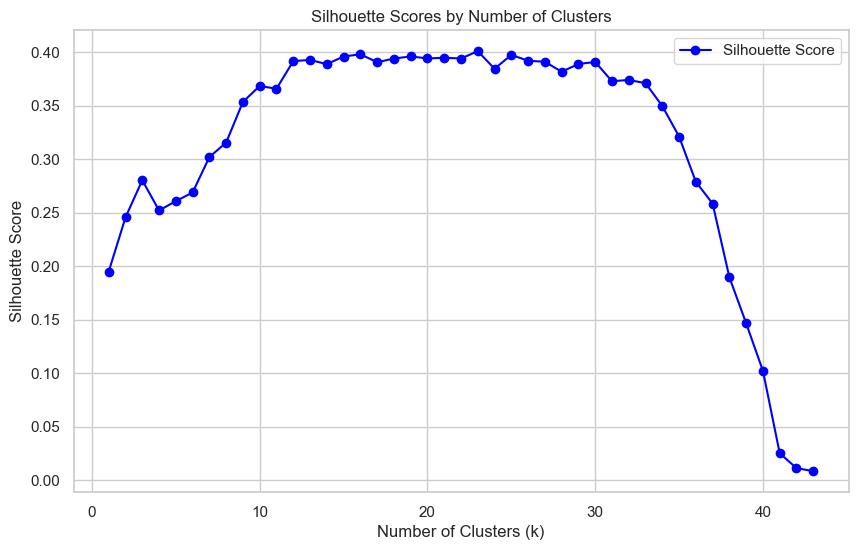

Silhouette score for best kappa: 0.458


C:\1. Python\LLM_mods_Topic_Modelling\summarization_methods\clustering_and_summarization.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels'] = best_kmeans_results['labels']


In [4]:
from summarization_methods.clustering_and_summarization import calc_clusters_with_kmeans

text_col='content'

# calculate the optimun kappa with KMeans via Silhouette score and using OPENAI embeddings ADA-002
df_sum_3, kmeans_results = calc_clusters_with_kmeans(df=df_sum_3, text_col=text_col, max_token_length=1000, is_pca=(True, 16))

In [5]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_3 = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


In [7]:
from summarization_methods.clustering_and_summarization import summarize_comments_by_cluster

text_col = 'content'
language = 'English'
topic = df_topics.iloc[2].topic

# produce the summaries for grouped comments by label
summaries_3 =summarize_comments_by_cluster(df=df_sum_3, text_col=text_col, prompt_name=prompt_template_3, gpt_model='gpt-4o', language=language, topic=topic)
print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
# load the prompt template for the final summary
prompt_template_final_3 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_comments')

### Summary of the Comments on Component Design Presentation

The discussion primarily revolves around organizing further dialogue and clarifying aspects of the presentation:

1. **Future Discussions**: Craig and David are mentioned as participants who will continue the discussion post-presentation.
2. **Clarification and Overview**: A need to provide further clarification on what's included in the design, indicating an overview might have been shared.
3. **Specific Component Inquiry**: Particular interest is shown in the titanium case, with suggestions to review and possibly reassess details about it.
4. **Preparation and Technical Setup**: There's a mention of setting things up before continuing, indicating some preparatory work during the discussion to streamline the process.
5. **Eager to Proceed**: Participants expressed eagerness to progress further with the presentation and discussions on the component design.

This summary encapsulates the main points and intentions of the comm

In [9]:
from summarization_methods.clustering_and_summarization import final_summary_of_clustered_comments

# produce the final summary for the 3rd technique
final_summary_3 = final_summary_of_clustered_comments(prompt=prompt_template_final_3, gpt_model='gpt-4o', topic=topic, summaries=summaries_3)

### Final Summary of Comments on the Component Design Presentation

The comments on the component design presentation reflect a multifaceted discussion encompassing future dialogue, technical troubleshooting, user interaction considerations, material characteristics, and power options. Below is a consolidated summary of the key insights:

1. **Future Discussions and Clarifications**:
   - Participants express interest in organizing further discussions, particularly with Craig and David, and seek additional clarification on the design specifics, suggesting an initial overview was provided.

2. **Consensus and Affirmations**:
   - There is widespread agreement and positive feedback among participants, with numerous affirmations and support for the ideas presented. Participants are eager to proceed and exhibit a positive outlook on the component design.

3. **Technical Troubleshooting and User Interaction**:
   - A significant portion of the comments revolves around troubleshooting techni

### 4TH SUMMARIZATION TECHNIQUE: TOPICS EXTRACTION OF COMMENTS, CLUSTER TOPICS AND SUMMARY THE CLUSTERS

We are going to implement our final technique in which we hope to be the best. Initially, we are going to extract topics for each comment/review. Moreover, we are going to cluster them with our best performing clustering technique, and for each cluster we are going to make a summary. Finally, based on these summaries we are going to create a final summary. 

In [ ]:
# extract topics using llm

In [ ]:
from summarization_methods.clustering_and_summarization import calc_clusters_with_kmeans

text_col='topic'

# calculate the optimun kappa with KMeans via Silhouette score and using OPENAI embeddings ADA-002
df_sum_3, kmeans_results = calc_clusters_with_kmeans(df=df_sum_3, text_col=text_col, max_token_length=1000, is_pca=(True, 16))

### BENCMARKING BASED ON THE EXTRACTED SUMMARIES OF THE THREE (3) TECHNIQUES

The evaluation will become by using these metrics: ROUGE score, BLEU score and BERTScore